In [56]:
from contextlib import redirect_stdout

t= var('t')

x_func = t
y_func = t^2
dx_func = diff(x_func,t)
dy_func = diff(y_func,t)

def x(p):
    return x_func.subs(t=p)

def y(p):
    return y_func.subs(t=p)

def dx(p):
    return dx_func.subs(t=p)

def dy(p):
    return dy_func.subs(t=p)

def module(p):
    v = vector([dx(p), dy(p)])
    return abs(v).n()

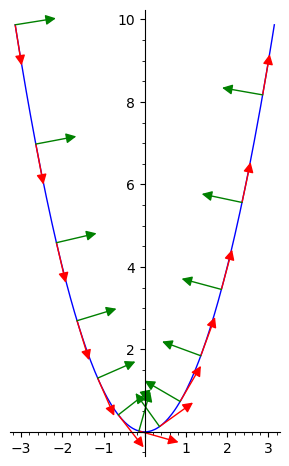

In [57]:

g = Graphics()
curva = parametric_plot((x(t), y(t)), (t,-pi,pi))
g += curva


for i in srange(-pi, pi, 0.5):
    start = vector([x(i).n(), y(i).n()])
    end_tan = vector([dx(i).n()/ module(i) , dy(i).n() / module(i)])
    end_norm = vector([-dy(i).n() / module(i), dx(i).n() / module(i)])
    
    g += arrow(start, start + end_tan ,color='red', width=1, arrowsize = 3)
    g += arrow(start, start + end_norm, color = 'green', width = 1, arrowsize = 3)
        


with open("output.txt", "w") as file:
    with redirect_stdout(file):
        show(g)